<a href="https://colab.research.google.com/github/pro8mari/code-practice/blob/main/%D0%94%D0%B5%D0%BC%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%8F_%D0%A0%D0%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2024: 1151.9 женщин на 1000 мужчин


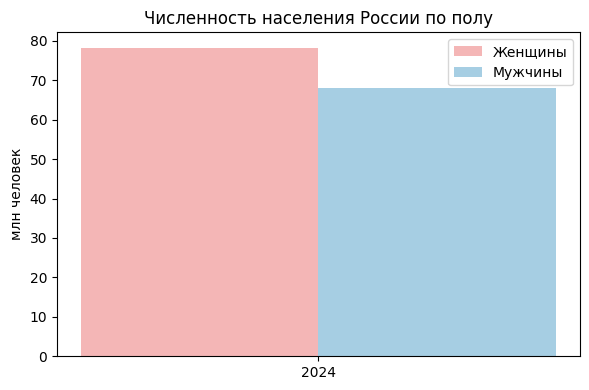

In [ ]:
import matplotlib.pyplot as plt

# ----- исходные данные (млн чел.) -----
data = {
    "2024": {"men": 67.917, "women": 78.234},   # Росстат, бюллетень на 01.01.2024
}

# ----- расчёт коэффициента (женщин на 1000 мужчин) -----
for yr, vals in data.items():
    ratio = vals["women"] / vals["men"] * 1000
    print(f"{yr}: {ratio:.1f} женщин на 1000 мужчин")

# ----- построение графика -----
years   = list(data.keys())
men     = [v["men"]   for v in data.values()]
women   = [v["women"] for v in data.values()]

x = range(len(years))
width = .35

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(x, women,  width, label="Женщины", color='#f4b6b6')
ax.bar([i+width for i in x], men, width, label="Мужчины", color='#a6cee3')

ax.set_xticks([i+width/2 for i in x])
ax.set_xticklabels(years)
ax.set_ylabel("млн человек")
ax.set_title("Численность населения России по полу")
ax.legend()
plt.tight_layout()
plt.show()





In [ ]:
import plotly.graph_objects as go

# ---- 1. Категории и данные ----
categories = ["Погибшие", "Раненые"]
vals_min = [ 90_000, 270_000]   # минимальная оценка
vals_med = [162_000, 486_000]   # средняя оценка
vals_max = [315_000, 945_000]   # максимальная оценка

# ---- 2. Построение графика ----
fig = go.Figure(data=[
    go.Bar(
        name='Минимальная оценка',
        x=categories,
        y=vals_min,
        marker_color='#ade8f4',
        text=[f"{v:,}" for v in vals_min],
        textposition='auto'
    ),
    go.Bar(
        name='Средняя оценка',
        x=categories,
        y=vals_med,
        marker_color='#48cae4',
        text=[f"{v:,}" for v in vals_med],
        textposition='auto'
    ),
    go.Bar(
        name='Максимальная оценка',
        x=categories,
        y=vals_max,
        marker_color='#023e8a',
        text=[f"{v:,}" for v in vals_max],
        textposition='auto'
    )
])

# ---- 3. Стилизация ----
fig.update_layout(
    title={
        'text': "Потери российских мужчин призывного возраста<br><sup>фев 2022 – апр 2025</sup>",
        'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'
    },
    xaxis=dict(title='Категория потерь'),
    yaxis=dict(title='Человек', tickformat=','),
    barmode='group',
    template='plotly_white',
    legend=dict(orientation='h', y=-0.2, x=0.5, xanchor='center'),
    width=800,
    height=500,
    margin=dict(t=80, b=100)
)

fig.show()


In [ ]:
import plotly.graph_objects as go

years  = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
births = [1.604, 1.481, 1.437, 1.398, 1.304, 1.264, 1.222]

# вычисляем %‑изменение
pct = [None] + [round((births[i]-births[i-1])/births[i-1]*100, 1)
                for i in range(1, len(births))]

fig = go.Figure()

# столбцы «рождений»
fig.add_bar(x=years, y=births,
            text=[f"{b:.3f}" for b in births],
            textposition="outside",
            marker_color="#6baed6",
            name="Рождений, млн")

# линия %‑изменения с подписями
fig.add_scatter(x=years[1:], y=pct[1:],
                mode="lines+markers+text",
                text=[f"{v:+.1f} %" for v in pct[1:]],
                textposition="bottom center",
                yaxis="y2",
                marker=dict(color="#d62728", size=8),
                line=dict(dash="dash"),
                name="% к пред. году")

fig.update_layout(
    title=("Годовая рождаемость в России (2018–2024)"
           ),
    xaxis_title="Год",
    yaxis_title="Рождений, млн",
    yaxis2=dict(title="% к пред. году", overlaying="y", side="right",
                showgrid=False, tickformat=".0f"),
    template="plotly_white",
    legend=dict(orientation='h', y=-0.25, x=0.5, xanchor='center'),
    width=900, height=550,
    margin=dict(t=100, b=120, l=60, r=60)
)

fig.show()


In [ ]:
import plotly.graph_objects as go

# Возрастные группы
ages = [
    '0-4', '5-9', '10-14', '15-19', '20-24', '25-29',
    '30-34', '35-39', '40-44', '45-49', '50-54',
    '55-59', '60-64', '65-69', '70-74', '75-79', '80+'
]

# Данные Росстата (2024), млн человек
men = [
    3.3, 3.4, 3.3, 3.2, 2.9, 2.6,
    2.3, 2.0, 1.8, 1.6, 1.4,
    1.1, 0.9, 0.7, 0.5, 0.3, 0.2
]

women = [
    3.1, 3.2, 3.1, 3.0, 2.7, 2.7,
    2.5, 2.3, 2.1, 1.9, 1.8,
    1.6, 1.4, 1.3, 1.2, 1.1, 2.0
]

# Создание графика
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ages, y=men,
    name='Мужчины',
    mode='lines+markers',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=ages, y=women,
    name='Женщины',
    mode='lines+markers',
    line=dict(color='red')
))

fig.update_layout(
    title='Численность мужчин и женщин по возрастным группам в России (2024)',
    xaxis_title='Возрастная группа',
    yaxis_title='Численность (млн)',
    template='plotly_white',
    legend=dict(orientation='h', x=0.5, xanchor='center'),
    width=900,
    height=500
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# 5‑летние точки
yrs = list(range(1925, 2025, 5)) + [2024]

# --- ориентировочные TFR (детей на женщину) ---
tfr = {
    "Россия"       : [5.6,5.4,5.3,5.0,4.7,2.9,2.6,2.4,2.1,2.0,1.9,1.9,1.9,1.6,1.3,1.22,1.16,1.25,1.45,1.5,1.35],
    "США"          : [3.0,2.9,2.8,2.7,2.6,3.4,3.7,3.6,2.5,2.0,1.8,1.8,1.9,2.0,2.0,2.06,2.07,1.93,1.84,1.71,1.67],
    "Франция"      : [2.7,2.7,2.6,2.6,2.4,2.8,2.9,2.8,2.4,2.0,2.0,1.9,1.8,1.8,1.7,1.88,1.92,2.0,1.92,1.84,1.79],
    "Япония"       : [5.1,5.0,4.8,4.6,4.4,2.8,2.5,2.0,2.1,1.9,1.9,1.8,1.7,1.5,1.4,1.36,1.32,1.37,1.45,1.34,1.26],
    "Великобритания":[2.0,2.1,2.1,2.1,2.0,2.2,2.2,2.0,2.0,2.0,1.9,1.8,1.8,1.8,1.7,1.64,1.64,1.66,1.70,1.57,1.50],
    "Китай"        : [6.5,6.4,6.2,6.0,5.8,6.1,5.9,5.3,4.8,3.8,3.0,2.2,1.9,1.8,1.7,1.60,1.55,1.55,1.50,1.25,1.05],
    "Италия"       : [4.5,4.3,4.2,3.9,3.6,2.4,2.4,2.3,2.5,2.4,2.2,1.6,1.4,1.3,1.2,1.24,1.34,1.44,1.37,1.24,1.24],
    "Индия"        : [6.0,5.9,5.8,5.7,5.6,5.9,5.7,5.4,5.1,4.7,4.3,3.8,3.3,2.9,2.6,2.38,2.29,2.20,2.17,2.05,2.01],
    "Аргентина"    : [3.4,3.4,3.3,3.2,3.1,3.4,3.4,3.2,3.1,3.0,2.9,2.6,2.5,2.4,2.4,2.37,2.34,2.29,2.24,1.86,1.75],
    "Мексика"      : [6.7,6.7,6.5,6.4,6.3,6.7,6.3,6.0,5.5,4.5,3.7,3.4,2.9,2.7,2.5,2.31,2.27,2.17,2.14,1.83,1.70],
    "Северная Корея":[6.8,6.6,6.5,6.3,6.1,5.8,5.8,5.2,4.4,3.5,2.7,2.0,2.0,2.2,2.1,1.95,1.91,1.90,1.90,1.87,1.80]
}

# --- DataFrame и вывод таблицы ---
df = pd.DataFrame(tfr, index=yrs)

# Если среда поддерживает интерактивный вывод:
try:
    import ace_tools as tools
    tools.display_dataframe_to_user(name="СКР 1925–2024, шаг 5 лет", dataframe=df)
except Exception:
    print(df.head(10))

# --- График сравнения ---
import plotly.graph_objects as go

fig = go.Figure()
for country in df.columns:
    fig.add_trace(go.Scatter(
        x=df.index, y=df[country],
        mode="lines",
        name=country
    ))

fig.update_layout(
    title="Суммарный коэффициент рождаемости (TFR), 1925–2024, шаг 5 лет",
    xaxis_title="Год",
    yaxis_title="Детей на одну женщину",
    template="plotly_white",
    width=1000, height=600,
    legend=dict(orientation="h", y=-0.25, x=0.5, xanchor="center")
)

fig.show()


In [1]:
import pandas as pd
import plotly.graph_objects as go

# 5‑летние точки
yrs = list(range(1925, 2025, 5)) + [2024]

# --- ориентировочные TFR (детей на женщину) ---
tfr = {
    "Россия"       : [5.6,5.4,5.3,5.0,4.7,2.9,2.6,2.4,2.1,2.0,1.9,1.9,1.9,1.6,1.3,1.22,1.16,1.25,1.45,1.5,1.35],
    "США"          : [3.0,2.9,2.8,2.7,2.6,3.4,3.7,3.6,2.5,2.0,1.8,1.8,1.9,2.0,2.0,2.06,2.07,1.93,1.84,1.71,1.67],
    "Франция"      : [2.7,2.7,2.6,2.6,2.4,2.8,2.9,2.8,2.4,2.0,2.0,1.9,1.8,1.8,1.7,1.88,1.92,2.0,1.92,1.84,1.79],
    "Япония"       : [5.1,5.0,4.8,4.6,4.4,2.8,2.5,2.0,2.1,1.9,1.9,1.8,1.7,1.5,1.4,1.36,1.32,1.37,1.45,1.34,1.26],
    "Великобритания":[2.0,2.1,2.1,2.1,2.0,2.2,2.2,2.0,2.0,2.0,1.9,1.8,1.8,1.8,1.7,1.64,1.64,1.66,1.70,1.57,1.50],
    "Китай"        : [6.5,6.4,6.2,6.0,5.8,6.1,5.9,5.3,4.8,3.8,3.0,2.2,1.9,1.8,1.7,1.60,1.55,1.55,1.50,1.25,1.05],
    "Италия"       : [4.5,4.3,4.2,3.9,3.6,2.4,2.4,2.3,2.5,2.4,2.2,1.6,1.4,1.3,1.2,1.24,1.34,1.44,1.37,1.24,1.24],
    "Индия"        : [6.0,5.9,5.8,5.7,5.6,5.9,5.7,5.4,5.1,4.7,4.3,3.8,3.3,2.9,2.6,2.38,2.29,2.20,2.17,2.05,2.01],
    "Аргентина"    : [3.4,3.4,3.3,3.2,3.1,3.4,3.4,3.2,3.1,3.0,2.9,2.6,2.5,2.4,2.4,2.37,2.34,2.29,2.24,1.86,1.75],
    "Мексика"      : [6.7,6.7,6.5,6.4,6.3,6.7,6.3,6.0,5.5,4.5,3.7,3.4,2.9,2.7,2.5,2.31,2.27,2.17,2.14,1.83,1.70],
    "Северная Корея":[6.8,6.6,6.5,6.3,6.1,5.8,5.8,5.2,4.4,3.5,2.7,2.0,2.0,2.2,2.1,1.95,1.91,1.90,1.90,1.87,1.80]
}

# --- DataFrame и вывод таблицы ---
df = pd.DataFrame(tfr, index=yrs)

# Если среда поддерживает интерактивный вывод:
try:
    import ace_tools as tools
    tools.display_dataframe_to_user(name="СКР 1925–2024, шаг 5 лет", dataframe=df)
except Exception:
    print(df.head(10))

# --- График сравнения ---
import plotly.graph_objects as go

fig = go.Figure()
for country in df.columns:
    fig.add_trace(go.Scatter(
        x=df.index, y=df[country],
        mode="lines",
        name=country
    ))

fig.update_layout(
    title="Суммарный коэффициент рождаемости (TFR), 1925–2024, шаг 5 лет",
    xaxis_title="Год",
    yaxis_title="Детей на одну женщину",
    template="plotly_white",
    width=1000, height=600,
    legend=dict(orientation="h", y=-0.25, x=0.5, xanchor="center")
)

fig.show()


      Россия  США  Франция  Япония  Великобритания  Китай  Италия  Индия  \
1925     5.6  3.0      2.7     5.1             2.0    6.5     4.5    6.0   
1930     5.4  2.9      2.7     5.0             2.1    6.4     4.3    5.9   
1935     5.3  2.8      2.6     4.8             2.1    6.2     4.2    5.8   
1940     5.0  2.7      2.6     4.6             2.1    6.0     3.9    5.7   
1945     4.7  2.6      2.4     4.4             2.0    5.8     3.6    5.6   
1950     2.9  3.4      2.8     2.8             2.2    6.1     2.4    5.9   
1955     2.6  3.7      2.9     2.5             2.2    5.9     2.4    5.7   
1960     2.4  3.6      2.8     2.0             2.0    5.3     2.3    5.4   
1965     2.1  2.5      2.4     2.1             2.0    4.8     2.5    5.1   
1970     2.0  2.0      2.0     1.9             2.0    3.8     2.4    4.7   

      Аргентина  Мексика  Северная Корея  
1925        3.4      6.7             6.8  
1930        3.4      6.7             6.6  
1935        3.3      6.5          